<a href="https://colab.research.google.com/github/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/blob/main/Code_Notebooks/Classification/07_Classification_K_medoids_Sunny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/2_clusters_only_on_output.csv

--2025-04-14 11:11:27--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/2_clusters_only_on_output.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5557 (5.4K) [text/plain]
Saving to: ‘2_clusters_only_on_output.csv.1’

2_clusters_only_on_ 100%[===================>]   5.43K  --.-KB/s    in 0s      

2025-04-14 11:11:27 (41.0 MB/s) - ‘2_clusters_only_on_output.csv.1’ saved [5557/5557]



In [2]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_one_hot_encoded.csv

--2025-04-14 11:11:28--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_one_hot_encoded.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13442 (13K) [text/plain]
Saving to: ‘3_one_hot_encoded.csv.1’

3_one_hot_encoded.c 100%[===================>]  13.13K  --.-KB/s    in 0s      

2025-04-14 11:11:28 (74.1 MB/s) - ‘3_one_hot_encoded.csv.1’ saved [13442/13442]



In [3]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/Optimal_Clusters_datasets/labeled_clusters_KMedoids_k_2_sel.csv

--2025-04-14 11:11:28--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/Optimal_Clusters_datasets/labeled_clusters_KMedoids_k_2_sel.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4499 (4.4K) [text/plain]
Saving to: ‘labeled_clusters_KMedoids_k_2_sel.csv.1’

labeled_clusters_KM 100%[===================>]   4.39K  --.-KB/s    in 0s      

2025-04-14 11:11:28 (45.0 MB/s) - ‘labeled_clusters_KMedoids_k_2_sel.csv.1’ saved [4499/4499]



In [4]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.model_selection import ParameterGrid

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

# Data
This dataset contains the classes obtained upon binary clustering of selected parameters from previous steps

In [5]:
data=pd.read_csv('2_clusters_only_on_output.csv')

In [6]:
data

,Sugars (Su),Weight of 300 Seeds (W3S),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Percentage (PPE),Protein Content (PCO),Cluster,Cluster Label
0,0.433,33.6,5567.4,1.86,33.2,0.82,1,Poor Production
1,0.334,34.4,2245.5,1.87,38.5,0.13,1,Poor Production
2,0.490,35.2,4326.7,2.04,33.6,0.15,1,Poor Production
3,0.163,52.3,6214.5,2.20,33.5,0.14,0,Good Production
4,0.795,31.2,3897.8,1.88,39.6,0.60,1,Poor Production
...,...,...,...,...,...,...,...,...
103,0.663,31.2,4472.7,2.60,39.7,0.32,0,Good Production
104,0.165,34.5,5643.7,2.60,33.6,0.36,0,Good Production
105,1.115,37.2,3067.1,1.80,37.2,1.15,1,Poor Production
106,0.295,35.3,3112.2,2.10,32.3,0.17,1,Poor Production


In [7]:
data_original=pd.read_csv('3_one_hot_encoded.csv')

In [8]:
data_original

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),...,Number of Seeds per Pod (NSP),Protein Content (PCO),C_2,S_2,S_3,G_2,G_3,G_4,G_5,G_6
0,C1S1G5,R1,50.5,130.3,111,0.433,0.732,1.4,3.1,33.2,...,1.86,0.82,False,False,False,False,False,False,True,False
1,C2S3G4,R1,44.5,132.0,80,0.334,0.674,7.1,2.2,38.5,...,1.87,0.13,True,False,True,False,False,True,False,False
2,C2S1G6,R1,52.2,150.0,83,0.490,0.677,1.8,1.3,33.6,...,2.04,0.15,True,False,False,False,False,False,False,True
3,C1S1G1,R1,50.5,140.8,66,0.163,0.745,1.1,3.0,33.5,...,2.20,0.14,False,False,False,False,False,False,False,False
4,C1S2G6,R2,49.2,175.6,73,0.795,0.725,7.5,2.1,39.6,...,1.88,0.60,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,C1S2G3,R3,44.0,209.0,132,0.663,0.875,9.0,1.3,39.7,...,2.60,0.32,False,True,False,False,True,False,False,False
104,C1S3G2,R2,53.3,160.0,130,0.165,0.651,1.8,3.2,33.6,...,2.60,0.36,False,False,True,True,False,False,False,False
105,C2S1G5,R2,50.2,148.3,151,1.115,0.683,6.1,1.2,37.2,...,1.80,1.15,True,False,False,False,False,False,True,False
106,C2S2G4,R1,52.2,156.0,66,0.295,0.632,6.9,1.1,32.3,...,2.10,0.17,True,True,False,False,False,True,False,False


# **Random Forest Algorithm**

**Kmediod clusters(2)**

*using only input parameters for kmediod clusters (2)*

In [26]:
data=pd.read_csv('3_one_hot_encoded.csv')
data_sub = data_original.iloc[:, 2:]
bool_cols = data_sub.select_dtypes(include='bool').columns
data_original[bool_cols] = data_original[bool_cols].astype(int)

data_X=pd.DataFrame(data_original.iloc[:,-8:])
#data_X

In [28]:
data_Y=pd.read_csv('labeled_clusters_KMedoids_k_2_sel.csv')
data_Y=pd.DataFrame(data_Y['Prod_Label_KMedoids_k=2_sel'])
#data_Y

In [29]:
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)

Training Random Forest with GridSearchCV...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy       : 0.7273
Precision      : 0.7597
Recall         : 0.7273
F1 Score       : 0.7377
Confusion Matrix:
 [[ 4  2]
 [ 4 12]]


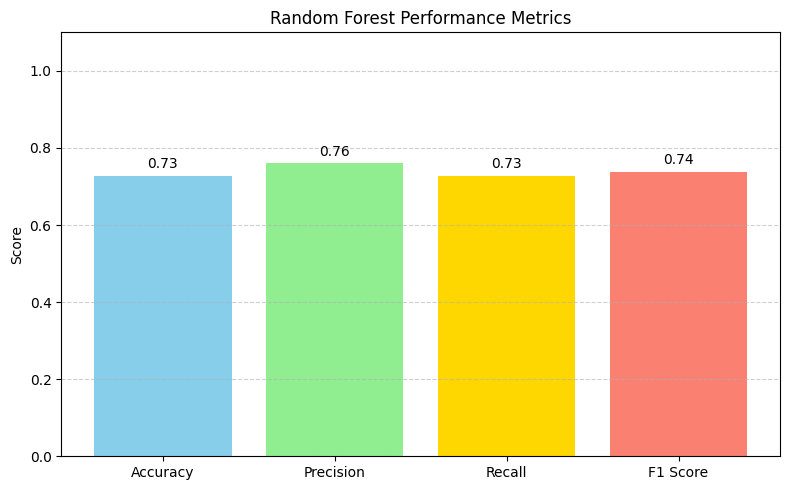

In [30]:
import warnings
warnings.filterwarnings("ignore")

# Define parameter grid for GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Train model
print("Training Random Forest with GridSearchCV...")
grid.fit(data_X_train, data_Y_train)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predict
y_pred = best_model.predict(data_X_test)

# Metrics
acc = accuracy_score(data_Y_test, y_pred)
prec = precision_score(data_Y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(data_Y_test, y_pred, average='weighted')
f1 = f1_score(data_Y_test, y_pred, average='weighted')
cm = confusion_matrix(data_Y_test, y_pred)

# Print metrics
print(f"\nAccuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print("Confusion Matrix:\n", cm)

# ---- Bar Plot ----
metrics = [acc, prec, rec, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, metrics, color=['skyblue', 'lightgreen', 'gold', 'salmon'])
plt.ylim(0, 1.1)
plt.title('Random Forest Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


*using output parameters on kmediod(2)*

In [31]:
data_X=pd.DataFrame(data_original.iloc[:,2:-8])
data_Y
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)

Training Random Forest with GridSearchCV...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Accuracy       : 0.9091
Precision      : 0.9318
Recall         : 0.9091
F1 Score       : 0.9126
Confusion Matrix:
 [[ 6  0]
 [ 2 14]]


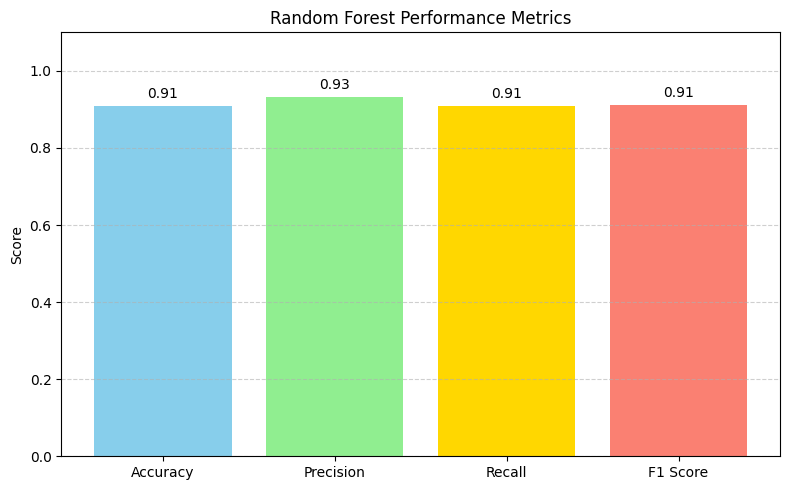

In [32]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Train model
print("Training Random Forest with GridSearchCV...")
grid.fit(data_X_train, data_Y_train)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predict
y_pred = best_model.predict(data_X_test)

acc = accuracy_score(data_Y_test, y_pred)
prec = precision_score(data_Y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(data_Y_test, y_pred, average='weighted')
f1 = f1_score(data_Y_test, y_pred, average='weighted')
cm = confusion_matrix(data_Y_test, y_pred)

print(f"\nAccuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print("Confusion Matrix:\n", cm)

metrics = [acc, prec, rec, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, metrics, color=['skyblue', 'lightgreen', 'gold', 'salmon'])
plt.ylim(0, 1.1)
plt.title('Random Forest Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


*kmediod on all parameters*

In [34]:
data_X=pd.DataFrame(data_original.iloc[:,2:])
data_Y
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)
#data_X

Training Random Forest with GridSearchCV...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy       : 0.9545
Precision      : 0.9610
Recall         : 0.9545
F1 Score       : 0.9556
Confusion Matrix:
 [[ 6  0]
 [ 1 15]]


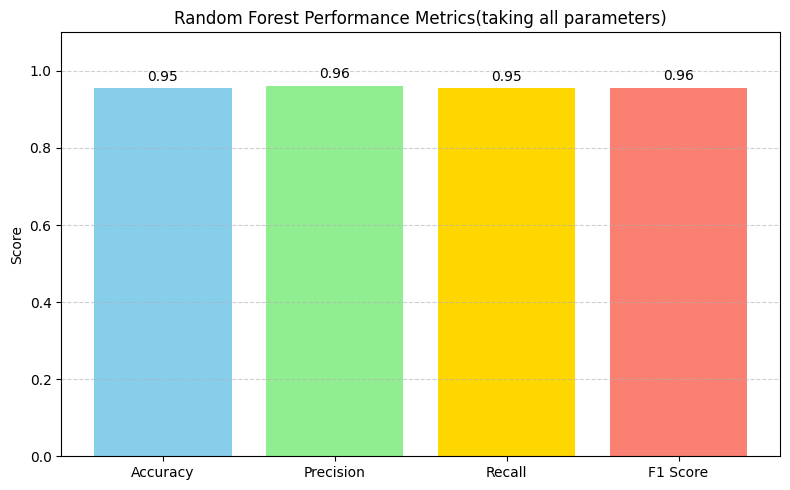

In [37]:

param_grid = {
    'n_estimators': [50, 100,110,120,150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Train model
print("Training Random Forest with GridSearchCV...")
grid.fit(data_X_train, data_Y_train)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predict
y_pred = best_model.predict(data_X_test)

acc = accuracy_score(data_Y_test, y_pred)
prec = precision_score(data_Y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(data_Y_test, y_pred, average='weighted')
f1 = f1_score(data_Y_test, y_pred, average='weighted')
cm = confusion_matrix(data_Y_test, y_pred)

print(f"\nAccuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print("Confusion Matrix:\n", cm)

metrics = [acc, prec, rec, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, metrics, color=['skyblue', 'lightgreen', 'gold', 'salmon'])
plt.ylim(0, 1.1)
plt.title('Random Forest Performance Metrics(taking all parameters)')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


**SVM on kmediod(2)**

*only cgs as parameters*

In [12]:
data=pd.read_csv('3_one_hot_encoded.csv')
data_sub = data_original.iloc[:, 2:]
bool_cols = data_sub.select_dtypes(include='bool').columns
data_original[bool_cols] = data_original[bool_cols].astype(int)

data_X=pd.DataFrame(data_original.iloc[:,-8:])
#data_X

In [13]:
data_Y=pd.read_csv('labeled_clusters_KMedoids_k_2_sel.csv')
data_Y=pd.DataFrame(data_Y['Prod_Label_KMedoids_k=2_sel'])
#data_Y

In [14]:
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)


SVM with 'linear' kernel
[[ 4  2]
 [ 6 10]]
Accuracy       : 0.6364
Precision      : 0.8333
Recall         : 0.6250
F1 Score       : 0.7143

SVM with 'poly' kernel
Best poly parameters: {'C': 10, 'degree': 2, 'gamma': 'scale'}
[[ 4  2]
 [ 4 12]]
Accuracy       : 0.7273
Precision      : 0.8571
Recall         : 0.7500
F1 Score       : 0.8000

SVM with 'rbf' kernel
[[ 4  2]
 [ 4 12]]
Accuracy       : 0.7273
Precision      : 0.8571
Recall         : 0.7500
F1 Score       : 0.8000

SVM with 'sigmoid' kernel
[[4 2]
 [7 9]]
Accuracy       : 0.5909
Precision      : 0.8182
Recall         : 0.5625
F1 Score       : 0.6667


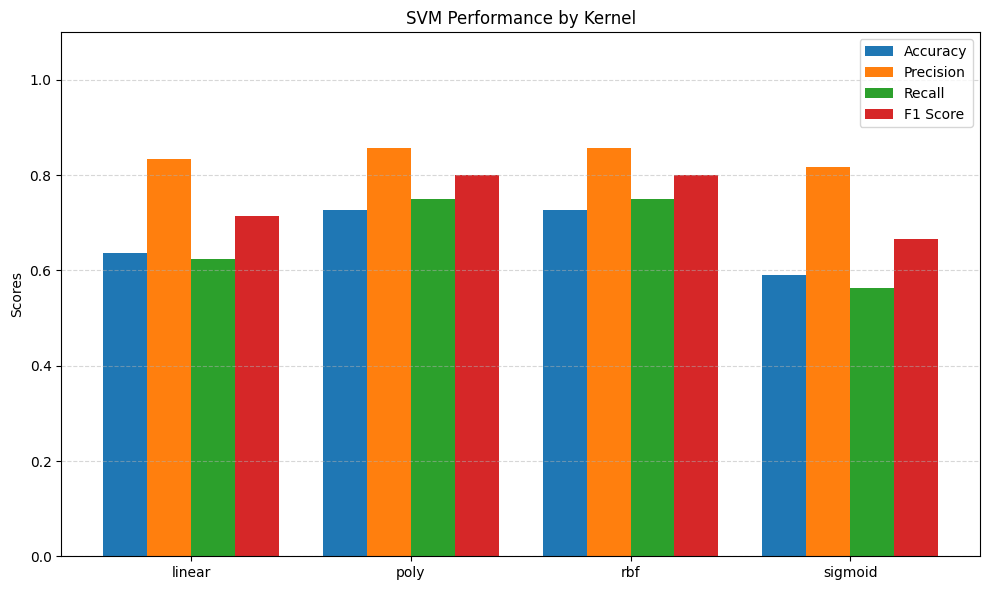

In [15]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    if kernel == 'poly':
        # GridSearch for polynomial kernel
        param_grid = {
            'degree': [2, 3, 4],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
        grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
        grid.fit(data_X_train, data_Y_train)
        model = grid.best_estimator_
        print("Best poly parameters:", grid.best_params_)
    else:
        model = SVC(kernel=kernel)
        model.fit(data_X_train, data_Y_train)

    y_pred = model.predict(data_X_test)

    acc = accuracy_score(data_Y_test, y_pred)
    prec = precision_score(data_Y_test, y_pred)
    rec = recall_score(data_Y_test, y_pred)
    f1 = f1_score(data_Y_test, y_pred)
    cf=confusion_matrix(data_Y_test,y_pred)

    print(cf)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*svm using only output features*

In [14]:
data_Y
data_X=pd.DataFrame(data_original.iloc[:,2:-8])
data_X
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)


SVM with 'linear' kernel
[[ 4  2]
 [ 2 14]]
Accuracy       : 0.8182
Precision      : 0.8750
Recall         : 0.8750
F1 Score       : 0.8750

SVM with 'poly' kernel
Best poly parameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto'}
[[ 4  2]
 [ 1 15]]
Accuracy       : 0.8636
Precision      : 0.8824
Recall         : 0.9375
F1 Score       : 0.9091

SVM with 'rbf' kernel
[[ 4  2]
 [ 3 13]]
Accuracy       : 0.7727
Precision      : 0.8667
Recall         : 0.8125
F1 Score       : 0.8387

SVM with 'sigmoid' kernel
[[ 0  6]
 [ 1 15]]
Accuracy       : 0.6818
Precision      : 0.7143
Recall         : 0.9375
F1 Score       : 0.8108


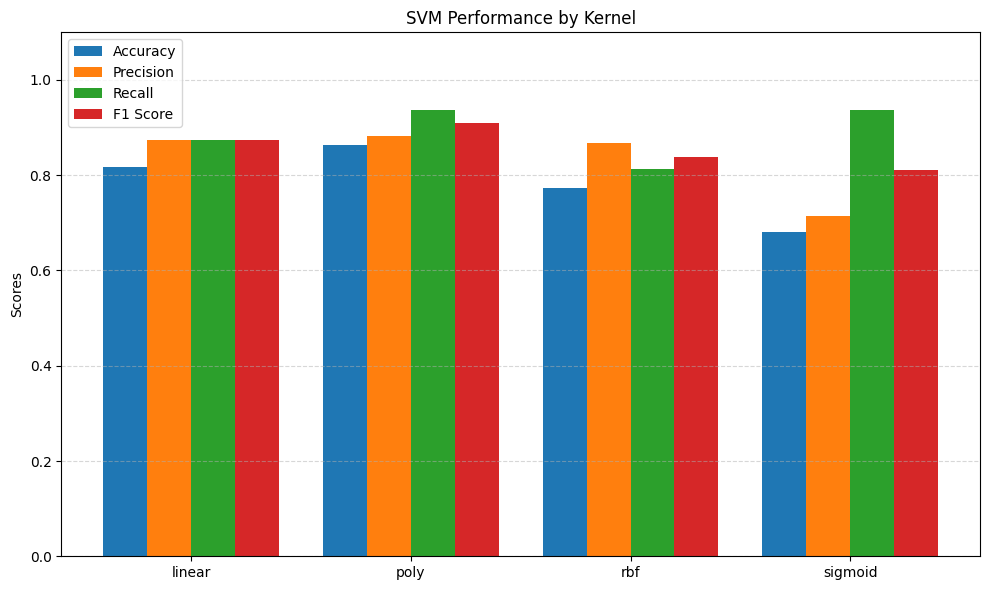

In [15]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    if kernel == 'poly':
        # GridSearch for polynomial kernel
        param_grid = {
            'degree': [2,],
            'C': [0.1,],
            'gamma': ['scale', 'auto']
        }
        grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
        grid.fit(data_X_train, data_Y_train)
        model = grid.best_estimator_
        print("Best poly parameters:", grid.best_params_)
    else:
        model = SVC(kernel=kernel)
        model.fit(data_X_train, data_Y_train)

    y_pred = model.predict(data_X_test)

    acc = accuracy_score(data_Y_test, y_pred)
    prec = precision_score(data_Y_test, y_pred)
    rec = recall_score(data_Y_test, y_pred)
    f1 = f1_score(data_Y_test, y_pred)
    cf=confusion_matrix(data_Y_test,y_pred)

    print(cf)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*svm using all the features*

In [24]:
data_Y
data_X=pd.DataFrame(data_original.iloc[:,2:])
data_X
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)
#data_X_train


SVM with 'linear' kernel
[[ 6  1]
 [ 1 14]]
Accuracy       : 0.9091
Precision      : 0.9333
Recall         : 0.9333
F1 Score       : 0.9333

SVM with 'poly' kernel
Best poly parameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto'}
[[ 6  1]
 [ 2 13]]
Accuracy       : 0.8636
Precision      : 0.9286
Recall         : 0.8667
F1 Score       : 0.8966

SVM with 'rbf' kernel
[[ 4  3]
 [ 3 12]]
Accuracy       : 0.7273
Precision      : 0.8000
Recall         : 0.8000
F1 Score       : 0.8000

SVM with 'sigmoid' kernel
[[ 0  7]
 [ 0 15]]
Accuracy       : 0.6818
Precision      : 0.6818
Recall         : 1.0000
F1 Score       : 0.8108


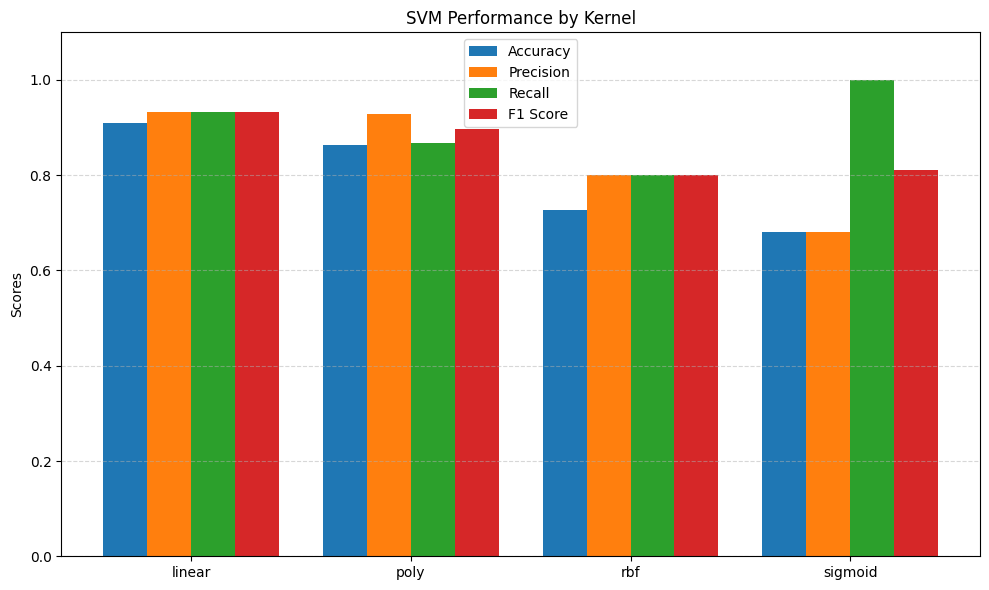

In [23]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    if kernel == 'poly':
        # GridSearch for polynomial kernel
        param_grid = {
            'degree': [2,],
            'C': [0.1,],
            'gamma': ['scale', 'auto']
        }
        grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
        grid.fit(data_X_train, data_Y_train)
        model = grid.best_estimator_
        print("Best poly parameters:", grid.best_params_)
    else:
        model = SVC(kernel=kernel)
        model.fit(data_X_train, data_Y_train)

    y_pred = model.predict(data_X_test)

    acc = accuracy_score(data_Y_test, y_pred)
    prec = precision_score(data_Y_test, y_pred)
    rec = recall_score(data_Y_test, y_pred)
    f1 = f1_score(data_Y_test, y_pred)
    cf=confusion_matrix(data_Y_test,y_pred)

    print(cf)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**SVM on kmeans(2)**

*svm on input parameters*

In [16]:
data_Y=pd.read_csv("2_clusters_only_on_output.csv")
data_Y=pd.DataFrame(data_Y['Cluster'])
data_X=pd.DataFrame(data_original.iloc[:,-8:])
data_Y
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)


SVM with 'linear' kernel
[[ 2  5]
 [ 5 10]]
Accuracy       : 0.5455
Precision      : 0.6667
Recall         : 0.6667
F1 Score       : 0.6667

SVM with 'poly' kernel
Best poly parameters: {'C': 10, 'degree': 2, 'gamma': 'scale'}
[[ 5  2]
 [ 3 12]]
Accuracy       : 0.7727
Precision      : 0.8571
Recall         : 0.8000
F1 Score       : 0.8276

SVM with 'rbf' kernel
[[ 3  4]
 [ 3 12]]
Accuracy       : 0.6818
Precision      : 0.7500
Recall         : 0.8000
F1 Score       : 0.7742

SVM with 'sigmoid' kernel
[[4 3]
 [6 9]]
Accuracy       : 0.5909
Precision      : 0.7500
Recall         : 0.6000
F1 Score       : 0.6667


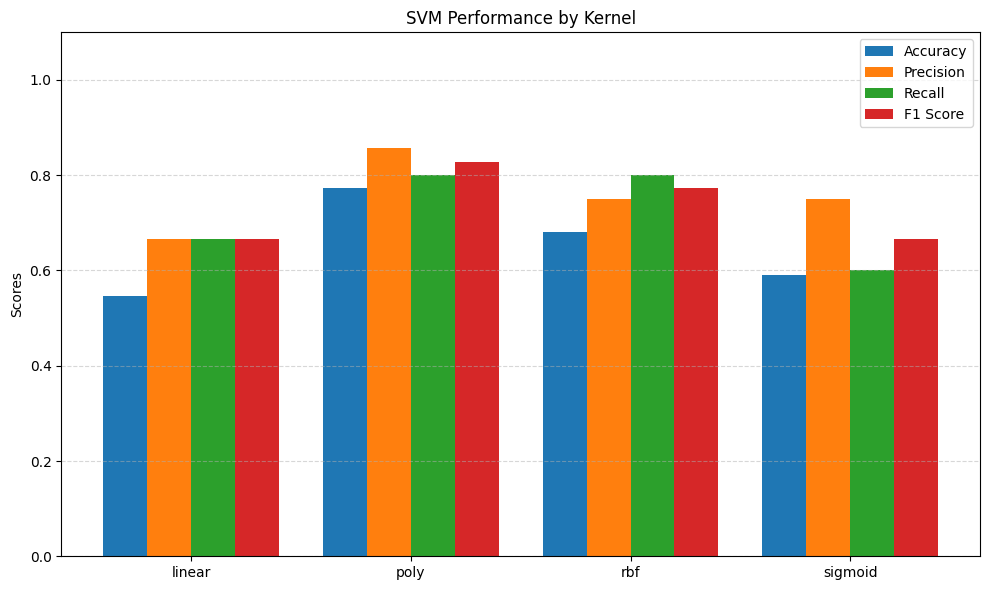

In [17]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    if kernel == 'poly':
        # GridSearch for polynomial kernel
        param_grid = {
            'degree': [2, 3, 4],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
        grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
        grid.fit(data_X_train, data_Y_train)
        model = grid.best_estimator_
        print("Best poly parameters:", grid.best_params_)
    else:
        model = SVC(kernel=kernel)
        model.fit(data_X_train, data_Y_train)

    y_pred = model.predict(data_X_test)

    acc = accuracy_score(data_Y_test, y_pred)
    prec = precision_score(data_Y_test, y_pred)
    rec = recall_score(data_Y_test, y_pred)
    f1 = f1_score(data_Y_test, y_pred)
    cf=confusion_matrix(data_Y_test,y_pred)

    print(cf)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*svm on output parameters*

In [18]:
data_X=pd.DataFrame(data_original.iloc[:,2:-8])
data_Y
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)


SVM with 'linear' kernel
[[ 6  1]
 [ 3 12]]
Accuracy       : 0.8182
Precision      : 0.9231
Recall         : 0.8000
F1 Score       : 0.8571

SVM with 'poly' kernel
Best poly parameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto'}
[[ 6  1]
 [ 4 11]]
Accuracy       : 0.7727
Precision      : 0.9167
Recall         : 0.7333
F1 Score       : 0.8148

SVM with 'rbf' kernel
[[ 4  3]
 [ 3 12]]
Accuracy       : 0.7273
Precision      : 0.8000
Recall         : 0.8000
F1 Score       : 0.8000

SVM with 'sigmoid' kernel
[[ 0  7]
 [ 0 15]]
Accuracy       : 0.6818
Precision      : 0.6818
Recall         : 1.0000
F1 Score       : 0.8108


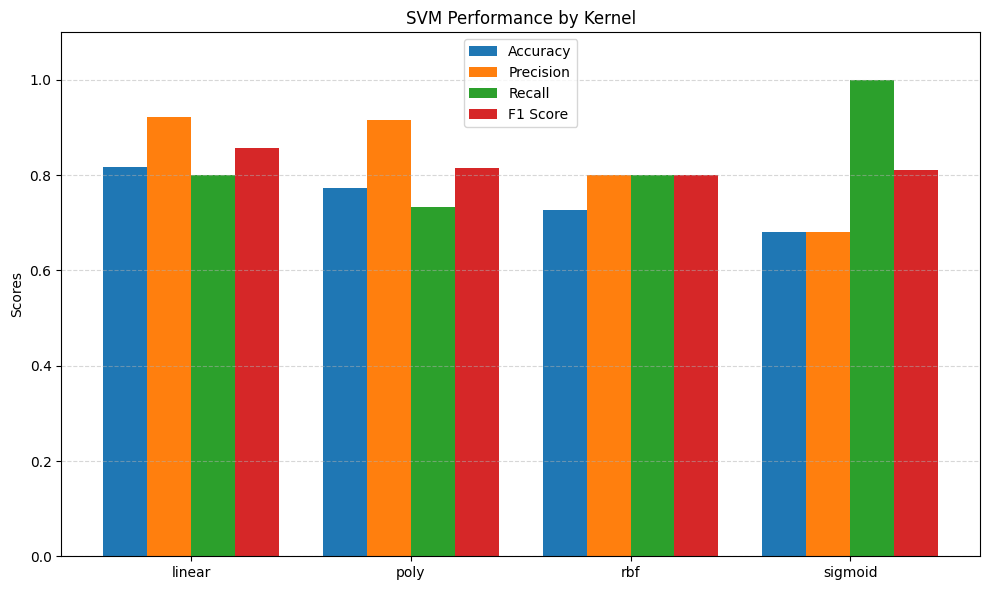

In [19]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    if kernel == 'poly':
        # GridSearch for polynomial kernel
        param_grid = {
            'degree': [2,],
            'C': [0.1,],
            'gamma': ['scale', 'auto']
        }
        grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
        grid.fit(data_X_train, data_Y_train)
        model = grid.best_estimator_
        print("Best poly parameters:", grid.best_params_)
    else:
        model = SVC(kernel=kernel)
        model.fit(data_X_train, data_Y_train)

    y_pred = model.predict(data_X_test)

    acc = accuracy_score(data_Y_test, y_pred)
    prec = precision_score(data_Y_test, y_pred)
    rec = recall_score(data_Y_test, y_pred)
    f1 = f1_score(data_Y_test, y_pred)
    cf=confusion_matrix(data_Y_test,y_pred)

    print(cf)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*svm on all parameters*

In [20]:
data_X=pd.DataFrame(data_original.iloc[:,2:])
data_Y
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)


SVM with 'linear' kernel
[[ 6  1]
 [ 1 14]]
Accuracy       : 0.9091
Precision      : 0.9333
Recall         : 0.9333
F1 Score       : 0.9333

SVM with 'poly' kernel
Best poly parameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto'}
[[ 6  1]
 [ 2 13]]
Accuracy       : 0.8636
Precision      : 0.9286
Recall         : 0.8667
F1 Score       : 0.8966

SVM with 'rbf' kernel
[[ 4  3]
 [ 3 12]]
Accuracy       : 0.7273
Precision      : 0.8000
Recall         : 0.8000
F1 Score       : 0.8000

SVM with 'sigmoid' kernel
[[ 0  7]
 [ 0 15]]
Accuracy       : 0.6818
Precision      : 0.6818
Recall         : 1.0000
F1 Score       : 0.8108


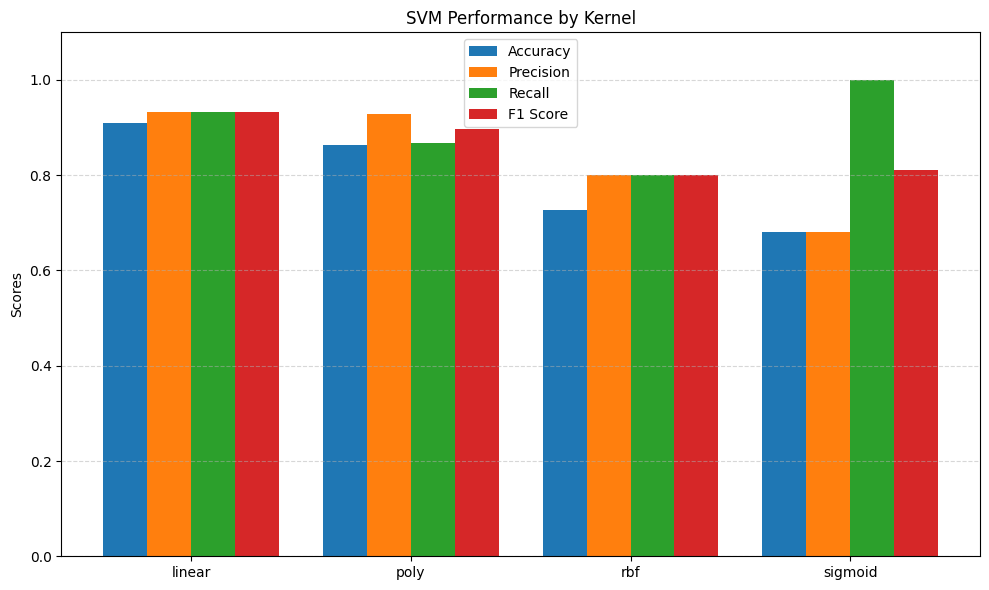

In [21]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    if kernel == 'poly':
        # GridSearch for polynomial kernel
        param_grid = {
            'degree': [2,],
            'C': [0.1,],
            'gamma': ['scale', 'auto']
        }
        grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
        grid.fit(data_X_train, data_Y_train)
        model = grid.best_estimator_
        print("Best poly parameters:", grid.best_params_)
    else:
        model = SVC(kernel=kernel)
        model.fit(data_X_train, data_Y_train)

    y_pred = model.predict(data_X_test)

    acc = accuracy_score(data_Y_test, y_pred)
    prec = precision_score(data_Y_test, y_pred)
    rec = recall_score(data_Y_test, y_pred)
    f1 = f1_score(data_Y_test, y_pred)
    cf=confusion_matrix(data_Y_test,y_pred)

    print(cf)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
